In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd


SCORES_FOLDER_1_ = "../src/modeling/_1_one_user_learn_neighbours/scores_simpler"

### Scatter plot de pos cases en train

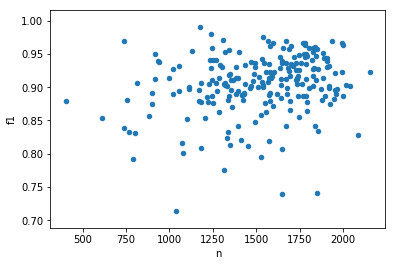

In [2]:
with open(SCORES_FOLDER_1_ + '/f1s_train_None_svc.json', 'r') as f:
    f1s = json.load(f)
with open(SCORES_FOLDER_1_ + '/pos_cases_train_None_svc.json', 'r') as f:
    pcs = pcs_train = json.load(f)
    
rows = [{"f1": f1s[u_id], "n": pcs[u_id]} for u_id in f1s.keys()]
df1 = pd.DataFrame(rows)
df1.plot.scatter("n","f1")

### Scatter plot de pos cases en test

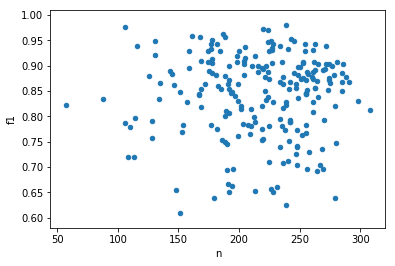

In [3]:
with open(SCORES_FOLDER_1_ + '/f1s_testv_None_svc.json', 'r') as f:
    f1s = json.load(f)
with open(SCORES_FOLDER_1_ + '/pos_cases_testv_None_svc.json', 'r') as f:
    pcs = json.load(f)
    
rows = [{"f1": f1s[u_id], "n": pcs[u_id]} for u_id in f1s.keys()]
df2 = pd.DataFrame(rows)
df2.plot.scatter("n","f1")

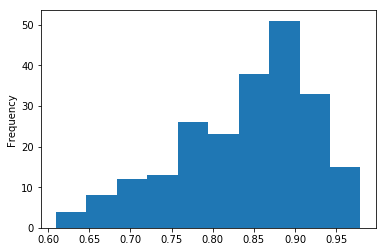

In [4]:
df2.f1.plot.hist()

In [5]:
def torreja(fname):
    with open(SCORES_FOLDER_1_ + fname, 'r') as f:
        d = json.load(f)
    values = [v for v in d.values()]
    values.sort(reverse=True)
    print('Hay {} usuarios procesados de 224'.format(len(values)))
    v = pd.Series(values)
    avg = sum(values) * 1.0 / len(values)
    print('Promedio de valores = {}'.format(avg))
    pos_cases = [pcs_train[u] for u in d.keys()]
#     print(pos_cases)
    print('Promedio de casos positivos en test= {}'.format(sum(pos_cases) * 1.0 / len(pos_cases) ))
    plt.plot(v)

### Todos los usuarios de prueba sin filtrar por tiempo

Hay 223 datos procesados de 224
Promedio de valores = 0.8404686179958804
Promedio de casos positivos en test= 1516.3273542600896


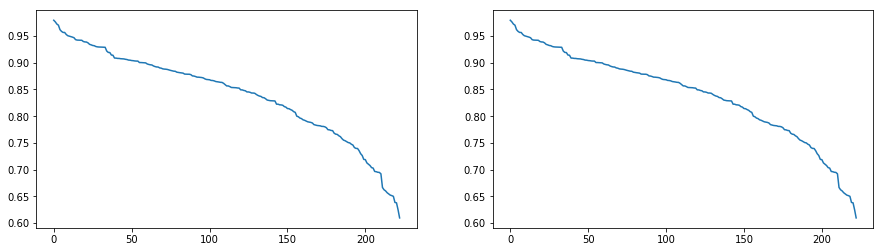

In [6]:
with open(SCORES_FOLDER_1_ + '/f1s_testv_None_svc.json', 'r') as f:
    d = json.load(f)
values_test = [v for v in d.values()]
values_test.sort(reverse=True)
print('Hay {} datos procesados de 224'.format(len(values_test)))
v_test = pd.Series(values_test)
avg = sum(values_test) * 1.0 / len(values_test)
print('Promedio de valores = {}'.format(avg))
pos_cases = [pcs_train[u] for u in d.keys()]
#     print(pos_cases)
print('Promedio de casos positivos en test= {}'.format(sum(pos_cases) * 1.0 / len(pos_cases) ))
fig, axes = plt.subplots(ncols=2)
v_test.plot(ax=axes[0], figsize=(15, 4))
v_test.plot(ax=axes[1], figsize=(15, 4))
# plt.plot(v)

In [7]:
def get_values(filename):
    with open(filename) as f:
        d = json.load(f)
    values = [v for v in d.values()]
    values.sort(reverse=True)
    print('Hay {} datos procesados de 224'.format(len(values)))
    return values

def print_averages(values, label):
    avg = sum(values) * 1.0 / len(values)
    print('\tF1s F1s F1s F1s F1s F1s F1s ')
    print('Promedio de valores {} = {}'.format(label, avg))
    print('Valor mínimo en {label}: {}\tValor máximo en {label}: {}'.format(min(values), max(values), label=label))

def print_pos_cases(values, label):
    avg = sum(values) * 1.0 / len(values)
    print('\tPOS_CASES POS_CASES POS_CASES POS_CASES POS_CASES ')
    print('Promedio de valores {} = {}. Cantidad de valores: {}'.format(label, avg, len(values)))
    print('Valor mínimo en {label}: {}\tValor máximo en {label}: {}'.format(min(values), max(values), label=label))
    
def process_f1s(mins):
    mins = 'None' if mins == 0 else str(mins)
    filename_test = SCORES_FOLDER_1_ + '/f1s_testv_{}_svc.json'.format(mins)
    filename_train = SCORES_FOLDER_1_ + '/f1s_train_{}_svc.json'.format(mins)
    filename_pc_test = SCORES_FOLDER_1_ + '/pos_cases_testv_{}_svc.json'.format(mins)
    filename_pc_train = SCORES_FOLDER_1_ + '/pos_cases_train_{}_svc.json'.format(mins)
    test_v = pd.Series(get_values(filename_test))
    train_v = pd.Series(get_values(filename_train))
    pc_train_v = pd.Series(get_values(filename_pc_train))
    pc_test_v = pd.Series(get_values(filename_pc_test))
    print_averages(train_v, 'TRAIN')
    print_averages(test_v, 'TEST')
    print_pos_cases(pc_test_v, 'TEST')
    print_pos_cases(pc_train_v, 'TRAIN')
    # plot
    #fig, axes = plt.subplots(ncols=2, sharey=True)
    # HISTOGRAMA AL LADO? (con bins. como mas arriba)
    ax = test_v.plot(label='Test', legend=True)
    ax = train_v.plot(figsize=(15, 7), label='Train', legend=True)
    ax.set_title('F1 scores for {} window (mins)'.format(mins))
    ax.set_ylabel('F1')
    ax.set_xlabel('Usuarios (ordenados) por f1')

"""
TODO:
- histogramas de frecuencia
- promedio de pos_cases (cantidad de datos es importante!)
- ver por que los scores aumentan
- ver que onda el que fallo: '824157'
"""

"\nTODO:\n- histogramas de frecuencia\n- promedio de pos_cases (cantidad de datos es importante!)\n- ver por que los scores aumentan\n- ver que onda el que fallo: '824157'\n"

Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TRAIN = 0.904330461497475
Valor mínimo en TRAIN: 0.7136672850958565	Valor máximo en TRAIN: 0.990582191780822
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TEST = 0.8404686179958804
Valor mínimo en TEST: 0.6097560975609756	Valor máximo en TEST: 0.9793388429752066
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TEST = 216.5605381165919. Cantidad de valores: 223
Valor mínimo en TEST: 57	Valor máximo en TEST: 308
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TRAIN = 1516.3273542600896. Cantidad de valores: 223
Valor mínimo en TRAIN: 403	Valor máximo en TRAIN: 2155


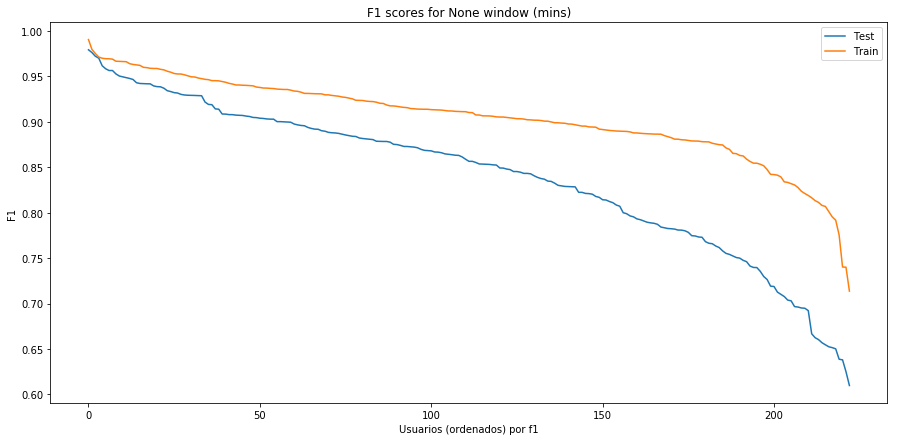

In [8]:
process_f1s(0) # todo el dataset 

Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TRAIN = 0.952354560130546
Valor mínimo en TRAIN: 0.8401037165082108	Valor máximo en TRAIN: 0.9986206896551724
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TEST = 0.94790836608011
Valor mínimo en TEST: 0.7777777777777779	Valor máximo en TEST: 1.0
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TEST = 158.14798206278027. Cantidad de valores: 223
Valor mínimo en TEST: 35	Valor máximo en TEST: 267
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TRAIN = 1107.3677130044844. Cantidad de valores: 223
Valor mínimo en TRAIN: 244	Valor máximo en TRAIN: 1868


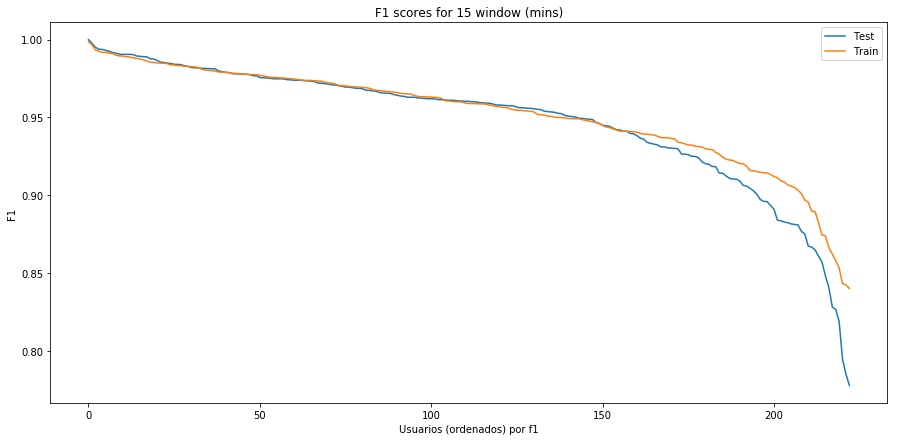

In [9]:
process_f1s(15)

Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TRAIN = 0.9410780978009973
Valor mínimo en TRAIN: 0.7875000000000001	Valor máximo en TRAIN: 0.9986232216613126
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TEST = 0.9327835415893079
Valor mínimo en TEST: 0.7454545454545455	Valor máximo en TEST: 1.0
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TEST = 163.65470852017938. Cantidad de valores: 223
Valor mínimo en TEST: 37	Valor máximo en TEST: 272
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TRAIN = 1145.7757847533633. Cantidad de valores: 223
Valor mínimo en TRAIN: 260	Valor máximo en TRAIN: 1902


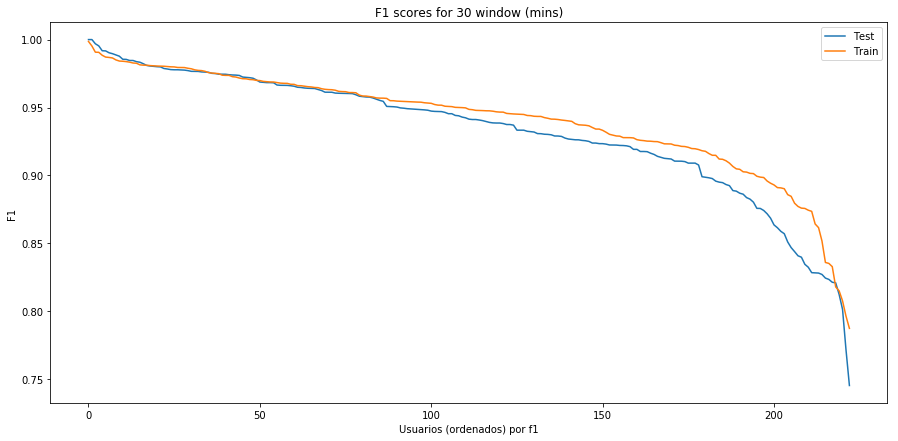

In [10]:
process_f1s(30)

Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TRAIN = 0.9342193564716529
Valor mínimo en TRAIN: 0.407176287051482	Valor máximo en TRAIN: 0.9963269054178145
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TEST = 0.9215827713397625
Valor mínimo en TEST: 0.2807017543859649	Valor máximo en TEST: 1.0
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TEST = 167.26905829596413. Cantidad de valores: 223
Valor mínimo en TEST: 38	Valor máximo en TEST: 273
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TRAIN = 1171.340807174888. Cantidad de valores: 223
Valor mínimo en TRAIN: 269	Valor máximo en TRAIN: 1910


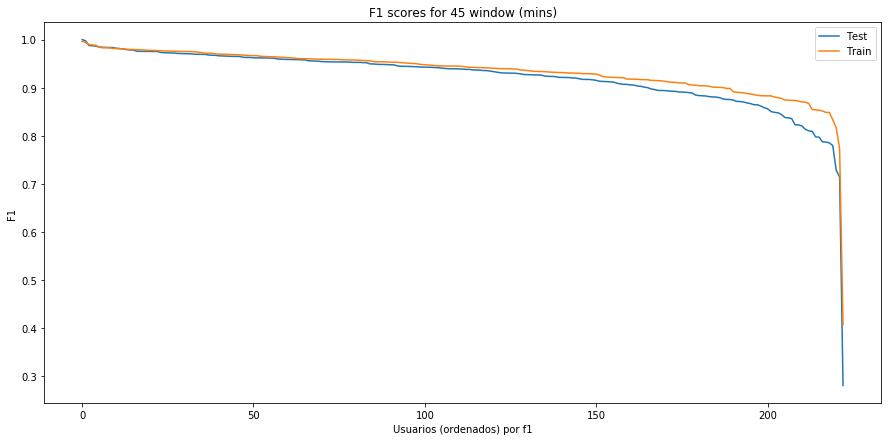

In [11]:
process_f1s(45)

Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TRAIN = 0.9309650893360824
Valor mínimo en TRAIN: 0.7758164165931156	Valor máximo en TRAIN: 0.9958772331653688
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TEST = 0.918335168802496
Valor mínimo en TEST: 0.6885245901639344	Valor máximo en TEST: 1.0
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TEST = 170.1031390134529. Cantidad de valores: 223
Valor mínimo en TEST: 39	Valor máximo en TEST: 276
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TRAIN = 1191.1973094170403. Cantidad de valores: 223
Valor mínimo en TRAIN: 276	Valor máximo en TRAIN: 1932


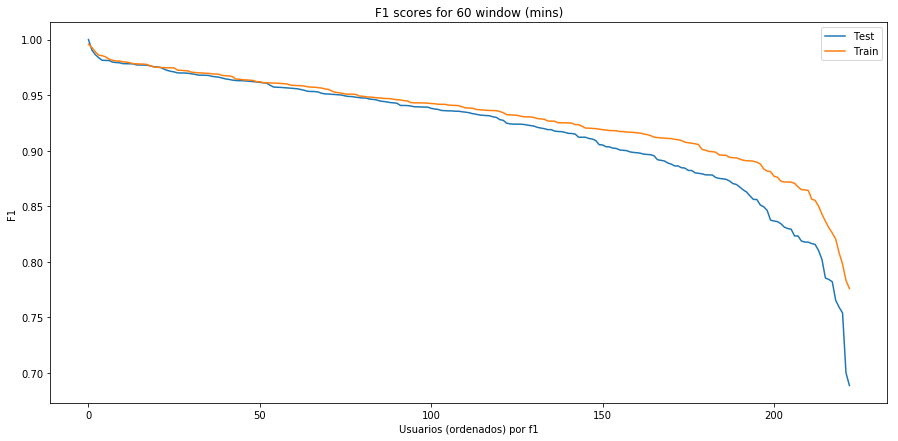

In [12]:
process_f1s(60)

Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TRAIN = 0.9145531543424226
Valor mínimo en TRAIN: 0.35026227944682886	Valor máximo en TRAIN: 0.9954379562043795
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TEST = 0.8949874986779435
Valor mínimo en TEST: 0.34753550543024225	Valor máximo en TEST: 0.9953051643192489
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TEST = 178.07174887892376. Cantidad de valores: 223
Valor mínimo en TEST: 42	Valor máximo en TEST: 279
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TRAIN = 1246.695067264574. Cantidad de valores: 223
Valor mínimo en TRAIN: 295	Valor máximo en TRAIN: 1953


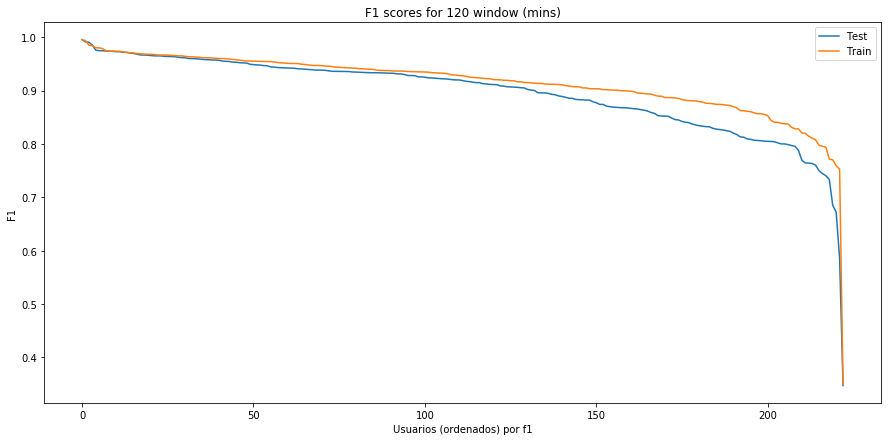

In [13]:
process_f1s(120)

Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TRAIN = 0.9144663267535157
Valor mínimo en TRAIN: 0.5738007380073801	Valor máximo en TRAIN: 0.9936305732484078
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TEST = 0.8874063460818603
Valor mínimo en TEST: 0.5407725321888412	Valor máximo en TEST: 1.0
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TEST = 183.37668161434976. Cantidad de valores: 223
Valor mínimo en TEST: 45	Valor máximo en TEST: 281
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TRAIN = 1284.0269058295964. Cantidad de valores: 223
Valor mínimo en TRAIN: 314	Valor máximo en TRAIN: 1965


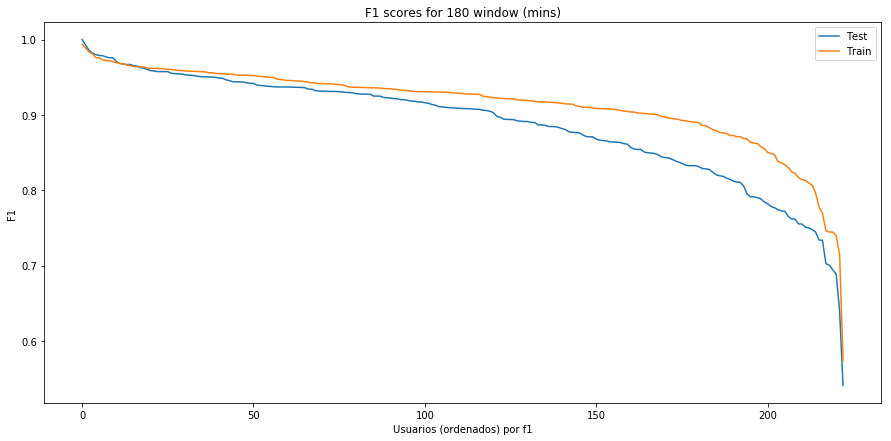

In [14]:
process_f1s(180)

Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TRAIN = 0.9126198291312805
Valor mínimo en TRAIN: 0.7005937234944868	Valor máximo en TRAIN: 0.9909828674481514
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TEST = 0.8810689156004569
Valor mínimo en TEST: 0.5384615384615385	Valor máximo en TEST: 0.9905362776025236
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TEST = 186.91928251121075. Cantidad de valores: 223
Valor mínimo en TEST: 46	Valor máximo en TEST: 282
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TRAIN = 1308.982062780269. Cantidad de valores: 223
Valor mínimo en TRAIN: 322	Valor máximo en TRAIN: 1978


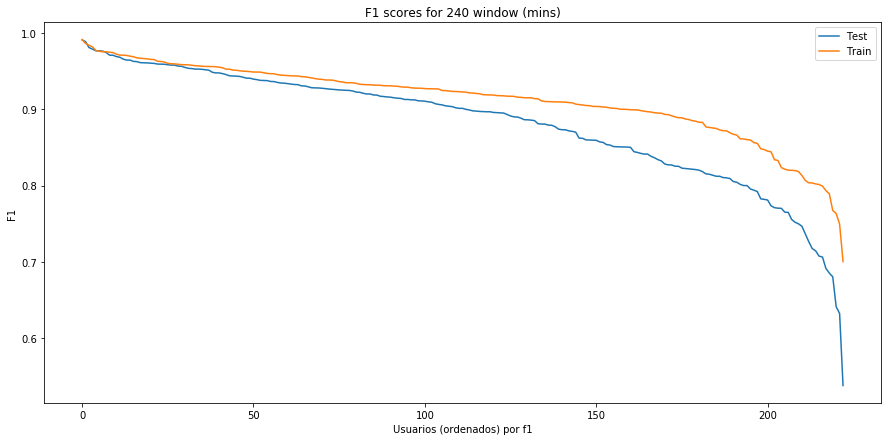

In [15]:
process_f1s(240)